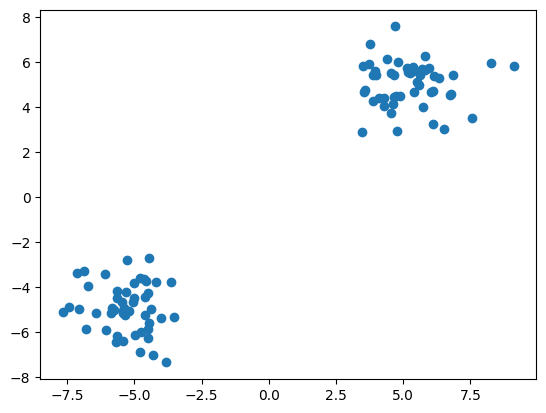

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

centroids = [(-5,-5), (5,5)]
cluster_std = [1,1]

X,y = make_blobs(n_samples=100, cluster_std=cluster_std, centers=centroids, n_features=2, random_state=2)

plt.scatter(X[:,0], X[:,1])
plt.show()

In [3]:
import random
import numpy as np

In [ ]:
class KMeansScratch:
    def __init__(self, n_clusters = 2, max_iteration = 100):
        self.n_clusters = n_clusters
        self.max_iteration = max_iteration
        self.centroids = None
        
        
    def fit_predict(self,X):
        #first assigning a centroid randomly on X
        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]
        
        #now will apply loop for max iteration 
        for i in range(self.max_iteration):
            
            #assign cluster:
            cluster_group = self.assign_cluster(X)
            #marking old centroid for finish code
            old_centroid = self.centroids
            
            #move centroids:
            self.centroids = self.move_centroids(X,cluster_group)
            
            #check finish:
            #check after each iteration for the match with old centroid after moving or update of centroid
            if(old_centroid == self.centroids).all():
                break
        return cluster_group
            
    def assign_cluster(self,X):
        #will find the cluster groups and distance through eucledian distance
        cluster_group = []
        distances = []
        
        #every point will find a distsnce and store it in distances 
        #and find the clossest minnimum distance from the centroid and mark it to clusters
        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))  # eucledian distance formula
            #find the min distance 
            min_distance = min(distances)
            #mark the index from list whichis minimum is 0 or 1
            index_pos = distances.index(min_distance)
            #will return cluster group like index position of distance from distances which calculated from Eucledian formula
            cluster_group.append(index_pos)
            distances.clear()
                
        
        return np.array(cluster_group)
    
    def move_centroids(self,X,cluster_group):
        #making list for new centroids
        new_centroids = []
        
        cluster_type = np.unique(cluster_group)
        
        for type in cluster_type:
            #getting the mean of each group on axis 0 mean geting X and y value
            new_centroids.append(X[cluster_group == type].mean(axis=0))
            
        return np.array(new_centroids)
            

In [15]:
km = KMeansScratch()
y_means = km.fit_predict(X)

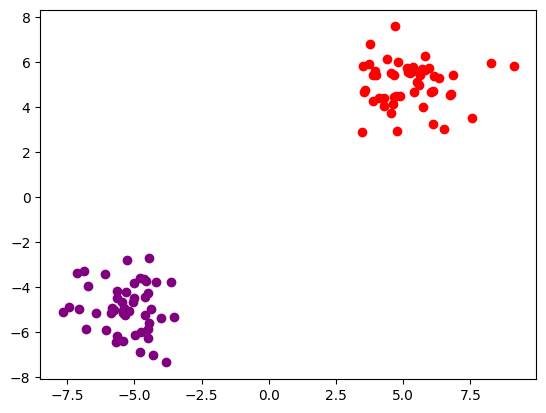

In [16]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1], color = 'purple')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1], color = 'red')

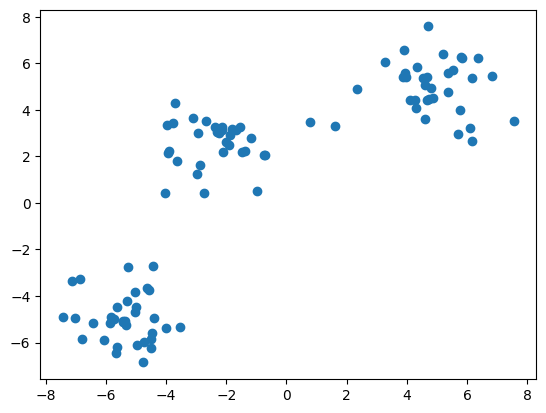

In [17]:
# tryping with three clusters:

cen = [(-5,-5), (5,5), (-2.5,2.5)]
clu_std = [1,1,1]

X,y = make_blobs(n_samples=100,cluster_std=clu_std,centers=cen,n_features=2,random_state=2)
plt.scatter(X[:,0], X[:,1])


In [18]:
km1 = KMeansScratch()
y_means1 = km1.fit_predict(X)  

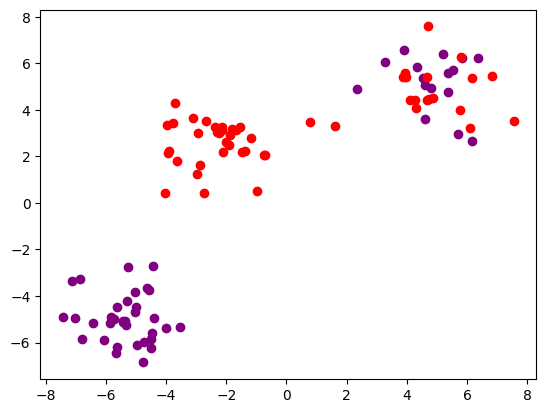

In [19]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1], color = 'purple')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1], color = 'red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1], color = 'red')